In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from Modules import Cleaner as cl

In [10]:
# Get data and clean it
dataset = cl.get_and_clean_df('./data/bilhandel_clean.csv')
dataset = dataset[dataset['Make'] == 'Mazda']

# Get features and price into different columns
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encode columns with string values
le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])
X[:, 1] = le.fit_transform(X[:,1])
X[:, 2] = le.fit_transform(X[:,2])
X[:, 3] = le.fit_transform(X[:,3])

# Train Test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create the model and if it with the data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make prediction on year
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)
score = regressor.score(X_test,y_test)
display(score)
display(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1) ), 1))
display(dataset)
display(X[0])

./data/bilhandel_clean.csv


0.8651669523144638

array([[2017.98, 2018.  ],
       [2010.49, 2010.  ],
       [2019.07, 2020.  ],
       [2012.85, 2012.  ],
       [2009.3 , 2008.  ],
       [2015.97, 2016.  ],
       [2020.33, 2018.  ],
       [2013.19, 2013.  ],
       [2016.13, 2016.  ],
       [2011.17, 2011.  ],
       [2014.4 , 2014.  ],
       [2015.65, 2015.  ],
       [2020.98, 2020.  ],
       [2016.25, 2015.  ],
       [2018.01, 2019.  ],
       [2008.99, 2009.  ],
       [2014.61, 2015.  ],
       [2020.35, 2020.  ],
       [2009.14, 2010.  ],
       [2016.43, 2015.  ],
       [2021.25, 2019.  ],
       [2004.76, 2005.  ],
       [2014.92, 2014.  ],
       [2007.27, 2009.  ],
       [2017.28, 2015.  ],
       [2014.35, 2015.  ],
       [2016.93, 2017.  ],
       [2016.06, 2014.  ],
       [2016.13, 2019.  ],
       [2005.04, 2002.  ],
       [2005.78, 2006.  ],
       [2013.  , 2016.  ],
       [2009.75, 2010.  ],
       [2010.56, 2010.  ],
       [2013.73, 2017.  ],
       [2015.79, 2016.  ],
       [2016.91, 2015.  ],
 

,Brændstoftype,Gearkasse,Make,Model,Antal døre,Grøn Ejerafgift,Hestekræfter,Kilometer,Km/l,Antal gear,0 - 100 km/t,Nypris,Pris,Tophastighed,Vægt,Årgang
233,Benzin,Manuel,Mazda,"3 2,0 Sky-G 165 Optimum",5.0,1880.0,165.0,119000.0,17.2,6.0,8.2,293392.0,124900,210.0,1295.0,2013
262,Benzin,Manuel,Mazda,"2 1,5 Sky-G 75 Core",5.0,660.0,75.0,119000.0,21.3,5.0,12.1,129988.0,84900,171.0,945.0,2015
302,Diesel,Manuel,Mazda,"6 2,2 DE 125 Go",4.0,6540.0,125.0,147000.0,18.2,6.0,10.7,329476.0,69800,195.0,1500.0,2010
311,Benzin,Manuel,Mazda,"3 1,6 Advance",5.0,2520.0,105.0,339000.0,15.9,5.0,12.2,218049.0,24900,184.0,1155.0,2009
424,Benzin,Automatisk,Mazda,"CX-3 2,0 Sky-G 120 Optimum aut.",5.0,1880.0,120.0,85000.0,17.2,6.0,9.9,290998.0,179500,187.0,1198.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19889,Diesel,Manuel,Mazda,"5 2,0 DE 143 Sport Van",5.0,5350.0,143.0,142000.0,10.9,6.0,11.0,239500.0,34990,197.0,1510.0,2008
19906,Benzin,Manuel,Mazda,"3 1,6 Advance",4.0,2520.0,105.0,120000.0,15.4,5.0,12.2,224998.0,64900,188.0,1277.0,2011
19934,Benzin,Manuel,Mazda,"2 1,3 Advance",5.0,1280.0,86.0,133000.0,19.2,5.0,12.9,149992.0,52800,172.0,930.0,2010
19967,Benzin,Automatisk,Mazda,"CX-5 2,0 Sky-G 160 Vision aut. AWD",5.0,3140.0,160.0,93000.0,15.2,6.0,9.6,440398.0,209900,187.0,1537.0,2014


array([0, 1, 0, 36, 5.0, 1880.0, 165.0, 119000.0, 17.2, 6.0, 8.2,
       '293392.0', 124900, 210.0, 1295.0], dtype=object)

# Make prediction on a car

In [12]:

display(regressor.predict([[40, 0, 1, 444, 157000, 2009, 102, 5, 5, 16.4, 10.0, 185.0,
       975.0, 2.52, 169990.0]]))


array([122516.8])

# Plot with km versus price

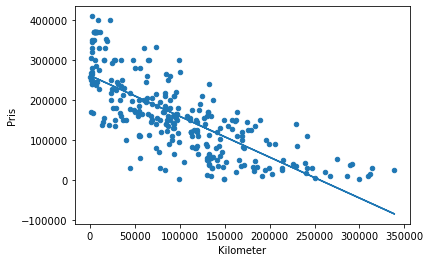

In [14]:


pd_km_price = dataset[dataset['Make'] == 'Mazda'][['Kilometer', 'Pris']]

pd_km_price.plot.scatter(x='Kilometer', y='Pris')
m, b = np.polyfit(pd_km_price['Kilometer'].values, pd_km_price['Pris'].values, 1)
plt.plot(pd_km_price['Kilometer'].values, m*pd_km_price['Kilometer'].values+b)


# Plot with km versus price

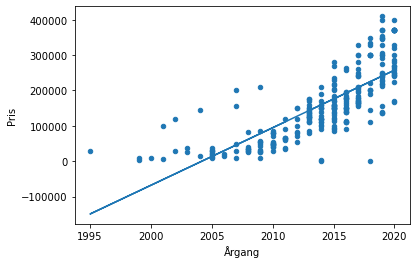

In [15]:
pd_year_price = dataset[dataset['Make'] == 'Mazda'][['Årgang', 'Pris']]
pd_year_price.plot.scatter(x='Årgang', y='Pris')
m, b = np.polyfit(pd_year_price['Årgang'].values, pd_year_price['Pris'].values, 1)
plt.plot(pd_year_price['Årgang'].values, m*pd_year_price['Årgang'].values+b)
